<h3>Step 1: Import libraries</h3>

In [66]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import pickle
import os

warnings.filterwarnings('ignore')

<h3>Step 2: Import data</h3>

In [67]:
# Read dataset
processed_data = os.path.abspath('../datasets/processed_data.csv')

# Merging two csv files
dataframe = pd.read_csv(processed_data)

dataframe.head()

,Location,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,0,2023,2,26,18,48,24.0,47.0,17.0,210.0,13.0,14.0,a_Good
1,7,2023,2,22,20,36,18.0,28.0,8.0,346.0,27.0,7.0,a_Good
2,0,2023,2,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
3,0,2023,2,28,18,37,19.0,37.0,18.0,272.0,11.0,21.0,a_Good
4,0,2023,2,27,18,47,24.0,46.0,19.0,216.0,8.0,14.0,a_Good


<h3>Step 3: Split data</h3>

In [68]:
# Selecting features and target variable
X = dataframe[['Location', 'Year', 'Month', 'Day', 'Hour', 'PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']]
y = dataframe['AQI']

# Data scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Step 4: Feature scaling</h3>

In [69]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h3>Step 5: Train model</h3>

In [70]:
# Building a Decision Tree model for regression
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

['Location', 'Year', 'Month', 'Day', 'Hour', 'AQI', 'PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2']


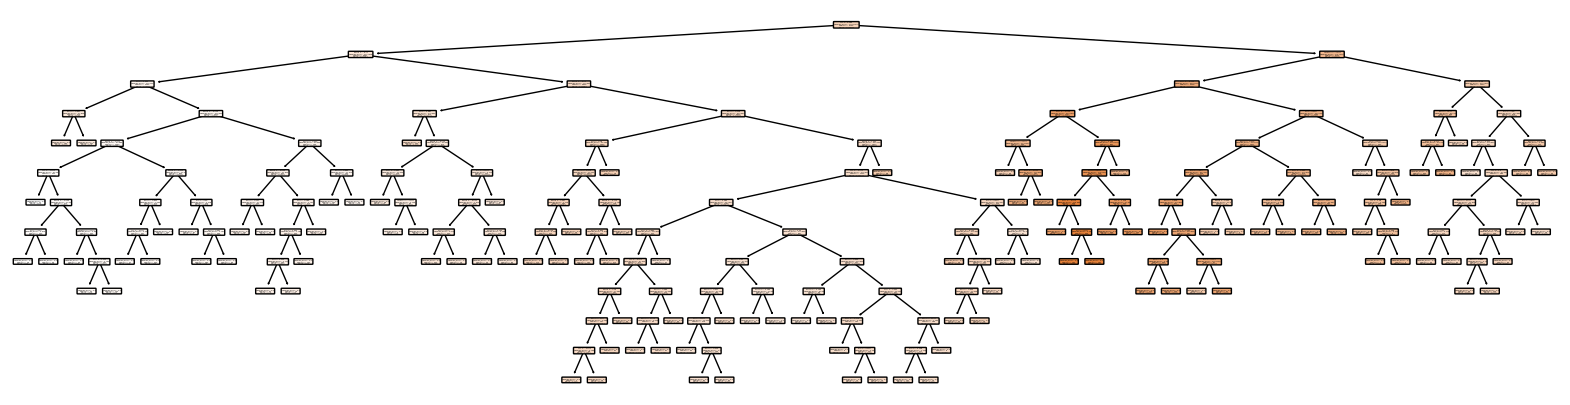

In [71]:
column_names = dataframe.columns.tolist()
del column_names[12:]
print(column_names)

plt.figure(figsize=(20,5))
plot_tree(model, feature_names=column_names, filled=True, rounded=True)
plt.show()

<h3>Step 6: Predict result / Score model</h3>

Once the model is trained, it can be used to make predictions on new data. The prediction is made by starting at the root node of the tree and navigating it based on the values of the attributes of the input sample. The prediction is given by the class label at the leaf node reached.

The accuracy of the model can be evaluated on a test set, which was previously held out from the training process.

In [72]:
# Prognostication
y_pred = model.predict(X_test)

<h3>Step 7: Evaluate model</h3>

In [73]:
# Metrics evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

MSE: 0.00
RMSE: 0.00
MAE: 0.00
R2 Score: 1.00


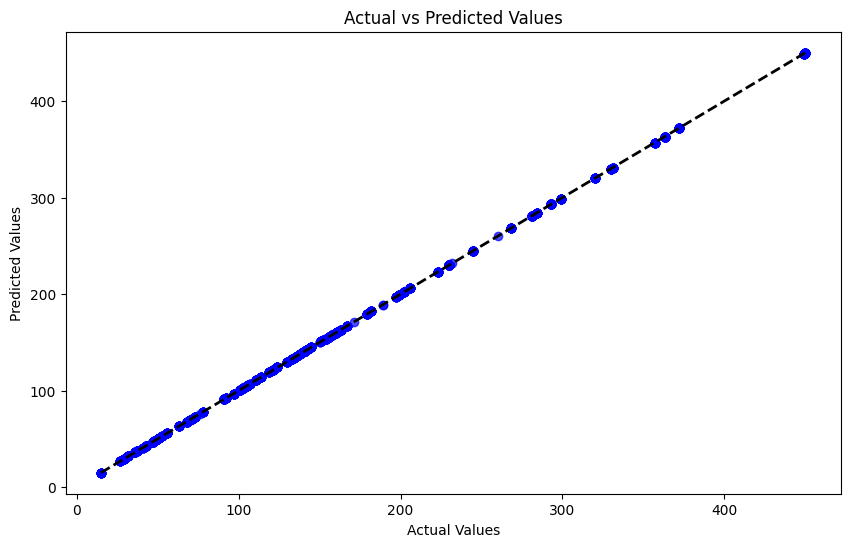

In [74]:
# Visualization of results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<h3>Step 8: Feature scaling</h3>

Serialize Decision Tree Model in pickle file.

In [75]:
with open('serialized/decisionTreeModel.pkl', 'wb') as file:
    pickle.dump(model, file)